In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
f1 = 'WorkforceUtilizationReport-Apprentice.csv'
f2 = 'WorkforceUtilizationReport-Journeymen.csv'
df = pd.read_csv(f1)
temp_df = pd.read_csv(f2)

df = pd.concat([df, temp_df], join='inner')

In [4]:
craft_levels = ['Journeymen', 'Apprentice']

levels = df.groupby(df.CRAFT_LEVEL)

summary = pd.DataFrame(columns=['LEVEL', 'CAUCASIAN', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE_AMERICAN', 
                                'OTHER', 'FEMALE'])

for i in range(len(craft_levels)):
    lvl = levels.get_group(craft_levels[i])
    summary.loc[i] = [craft_levels[i], lvl['CAUCASIAN'].sum()/df['CAUCASIAN'].sum(), 
                      lvl['AFRICAN_AMERICAN'].sum()/df['AFRICAN_AMERICAN'].sum(),
                      lvl['HISPANIC'].sum()/df['HISPANIC'].sum(), lvl['ASIAN'].sum()/df['ASIAN'].sum(),
                      lvl['NATIVE_AMERICAN'].sum()/df['NATIVE_AMERICAN'].sum(), 
                      lvl['OTHER'].sum()/df['OTHER'].sum(), lvl['TOTAL_FEMALE'].sum()/df['TOTAL_FEMALE'].sum()]

In [5]:
summary

,LEVEL,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,FEMALE
0,Journeymen,0.917302,0.767743,0.822106,0.782835,0.931969,0.95408,0.590112
1,Apprentice,0.082698,0.232257,0.177894,0.217165,0.068031,0.04592,0.409888


Text(0.5, 0, 'Minority Groups')

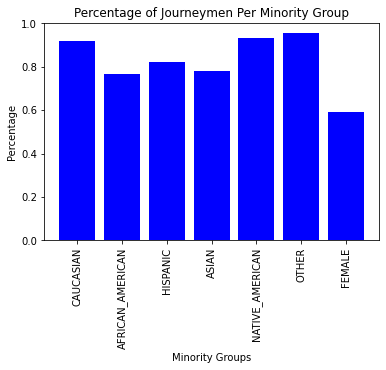

In [16]:
plt.bar(['CAUCASIAN', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE_AMERICAN', 
        'OTHER', 'FEMALE'], summary.loc[0][1:], color = 'blue')
plt.xticks(rotation=90)
plt.title('Percentage of Journeymen Per Minority Group')
plt.ylabel('Percentage')
plt.xlabel('Minority Groups')

In [18]:
plt.savefig('Journeymen_Per_MinorityGroup.png')

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Minority Groups')

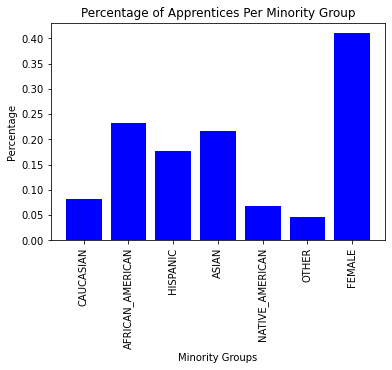

In [17]:
plt.bar(['CAUCASIAN', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE_AMERICAN', 
        'OTHER', 'FEMALE'], summary.loc[1][1:], color = 'blue')
plt.xticks(rotation=90)
plt.title('Percentage of Apprentices Per Minority Group')
plt.ylabel('Percentage')
plt.xlabel('Minority Groups')

In [19]:
plt.savefig('Apprentices_Per_MinorityGroup.png')

<Figure size 432x288 with 0 Axes>

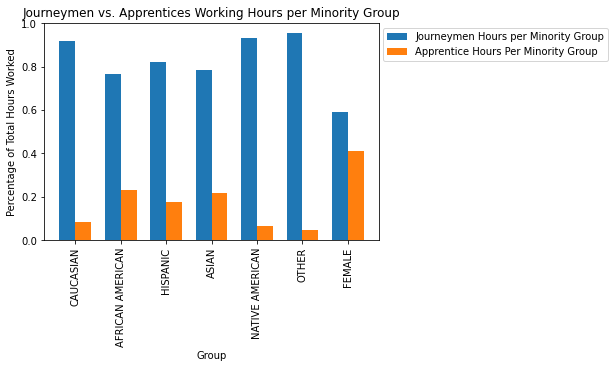

In [25]:
bar_width = 0.35
index = np.arange(7)

fig, ax = plt.subplots()
j = ax.bar(index, summary.loc[0][1:], bar_width,
                label="Journeymen Hours per Minority Group")

a = ax.bar(index+bar_width, summary.loc[1][1:],
                 bar_width, label="Apprentice Hours Per Minority Group")

ax.set_xlabel('Group')
ax.set_ylabel('Percentage of Total Hours Worked')
ax.set_title('Journeymen vs. Apprentices Working Hours per Minority Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['CAUCASIAN', 'AFRICAN AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE AMERICAN', 
        'OTHER', 'FEMALE'])
ax.legend(bbox_to_anchor=(1.7, 1), loc='upper right')
plt.xticks(rotation=90)

plt.show()